数据可视化是提取特征非常重要的步骤，是直观的认识数据的。

**1V1**变量间的关系，变化关系<br>
**变量对问题结果的影响**<br>
**数据的分布**<br>

![](./数据可视化相关库.png)

In [3]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### 曲线图公用方法的抽取

In [181]:
def bulid_line_graph(x,y,x_lable,y_lable,title,marker):
    if isinstance(x[0], str):
        x_str = x
        x = range(len(x))
        plt.xticks(x, x_str, rotation=45)
    plt.xlabel(x_lable,fontsize=20)
    plt.ylabel(y_lable,fontsize=20)
    plt.title(title,fontsize=25)
    plt.plot(x,y,marker=marker)
    plt.show()

### 散点图公用方法

In [153]:
def build_scatter_graph(x,y,x_lable,y_lable,title):

    if isinstance(x[0], str):
        x_str = x
        x = range(len(x))
        plt.xticks(x, x_str, rotation=45)
    
    plt.scatter(x,y)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.title(title)
    plt.show()

### 散点图(三维特征的表达，分类散点图)

In [203]:
def build_scatter_third(x,y,z,colors,x_lable,y_lable,title):
    fig, ax = plt.subplots()
    for i,s in enumerate(z):#行索引拿到横坐标
        ax.scatter(x.loc[s],y.loc[s], c=colors[i], label=s,alpha=0.5, edgecolors='none')
    ax.legend(loc='best', fontsize=12)#设置图例
    ax.set_xlabel(x_lable, fontsize=15)
    ax.set_ylabel(y_lable, fontsize=15)
    plt.title(title, fontsize=20)
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)

In [39]:
# month/year and passengers
import numpy as np
# 绘制分组柱状图的函数
def grouped_bar_graph(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

### 箱线图

In [206]:
def build_box_plot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color}
               , sym='ro')
               

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

### 箱线图
* 对时间进行分类，可推广为堆某一特征，再选择一个维度进行分类
* 此处暂时未找到与上个方法合并的方式

In [217]:
#spilt_one_feature2N
def build_box_plot_2(x_feature1,x_feature2):
    _,axe=plt.subplots()
    bplot = axe.boxplot([x_feature1,x_feature2],patch_artist=True, sym='ro')
    bplot['boxes'][1].set_facecolor('darkred')
    plt.xticks([1,2],['x_feature1','x_feature2'])
    plt.grid(True)

使用seaborn自带数据集**航班**问题如下：
* 乘客随着年份变化的情况
* 分析在一年中各月份的分布

### 问题1：解决思路<br>
* 对数据按照年份分组，然后求和，这个是使用pandas的groupby()/sum()函数
* 以年份为x轴，乘客年度求和作为y轴

In [155]:
data=sns.load_dataset('flights')
print("------------查看数据的前5行---------------")
print(data.head(),'\n')
print('----------------查看数据的数据类型，缺失值的情况----------------')
data.info()

------------查看数据的前5行---------------
   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121 

----------------查看数据的数据类型，缺失值的情况----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


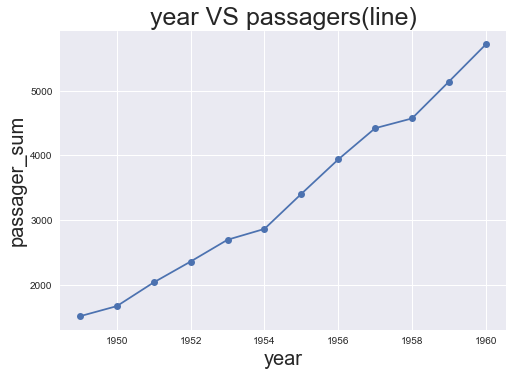

In [37]:
per_year_passenger=data.groupby('year').sum()#在此处返回的是DataFrame
y=per_year_passenger['passengers'].values#获取其值
x=per_year_passenger.index
bulid_line_graph(x,y,'year','passager_sum','year VS passagers(line)','o')

### 不做求和是什么样呢？前后对比

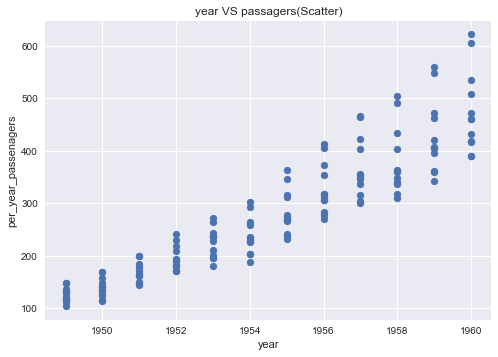

In [223]:
build_scatter_graph(data.year.values,data.passengers.values,'year','per_year_passenagers','year VS passagers(Scatter)')

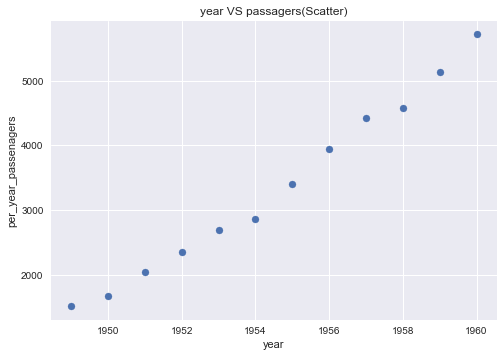

In [34]:
per_year_passenger=data.groupby('year').sum()#在此处返回的是DataFrame
y=per_year_passenger['passengers'].values#获取其值
x=per_year_passenger.index
build_scatter_graph(x,y,'year','per_year_passenagers','year VS passagers(Scatter)')

### 小结：
在刻画两个变量之间的关系时，或者一个变量随着另一个变量的变化趋势时，我们可以使用曲线/折线/散点图，我会继续试下去

### 问题2：解决思路<br>
* 柱状图解决


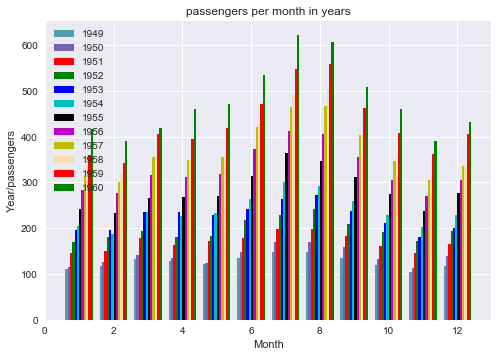

In [42]:

group_by_month_year = data.groupby(["year","month"]).aggregate({"passengers":"sum"}).reset_index()
year_value = data.groupby("year").mean().index.values#对year 求平均
month_x =  data.groupby("month").mean().index.values
y_data = []
for t_year in year_value:
    y_data.append(group_by_month_year[group_by_month_year["year"].isin([t_year])]["passengers"])
    
#调用绘图函数
grouped_bar_graph(x_data = [1,2,3,4,5,6,7,8,9,10,11,12]
               , y_data_list = y_data
               , y_data_names = year_value
               , colors = ['#539caf', '#7663b0','r','g','b','c','k','m','y','wheat','r','g','c']
               , x_label = 'Month'
               , y_label = 'Year/passengers'
               , title = 'passengers per month in years')

### 练习2：鸢尾花花型尺寸分析
* 萼片（sepal）和花瓣（petal）的大小关系
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [46]:
flower_data = sns.load_dataset("iris")
print('------------查看数据--------------')
print(flower_data.head(),'\n')
print('------------查看数据类型，是否有缺失值----------')
flower_data.info()

------------查看数据--------------
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa 

------------查看数据类型，是否有缺失值----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


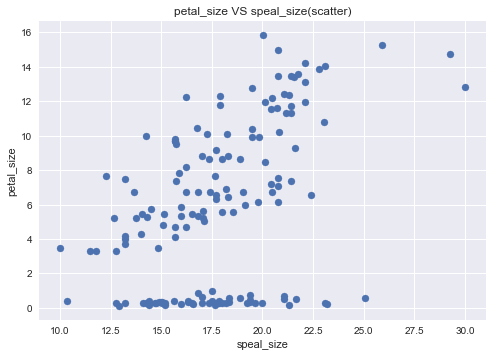

In [85]:
flower_data['sepal_size'] = flower_data['sepal_width']*flower_data['sepal_length']
flower_data['petal_size'] = flower_data['petal_width']*flower_data['petal_length']
x=flower_data['sepal_size'].values
y=flower_data['petal_size'].values
build_scatter_graph(x,y,'speal_size','petal_size','petal_size VS speal_size(scatter)')

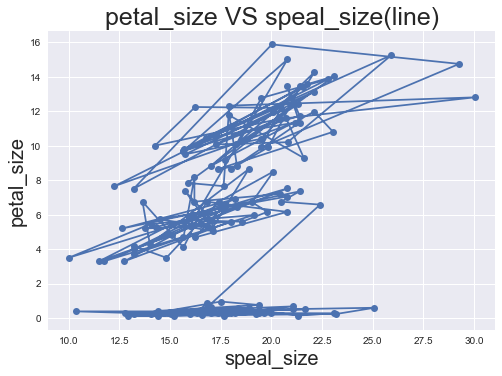

In [59]:
bulid_line_graph(x,y,'speal_size','petal_size','petal_size VS speal_size(line)','o')

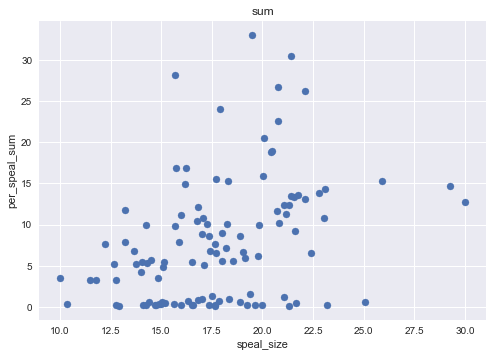

In [55]:
groupby_speal_size = flower_data.groupby('speal_size').sum()
y=groupby_speal_size['petal_size'].values
x=groupby_speal_size.index
build_scatter_graph(x,y,'speal_size','per_speal_sum','sum')

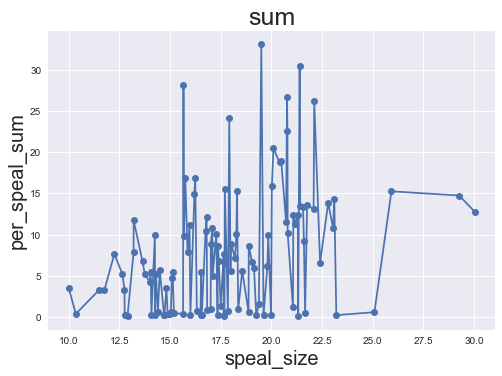

In [56]:
bulid_line_graph(x,y,'speal_size','per_speal_sum','sum','o')

从上面我们很清楚的看到，这种数据分布是**不适合做曲线图的,散点图非常的恰当**

### 问题2：不同种类（species）鸢尾花萼片和花瓣的大小关系
* 在上图的基础上，给不同的种类加上颜色，表示三维信息，分别是萼片、花瓣、花的种类
* 此时从一个元素——点来看，包含(x,y,color)所以每个对应一个维度

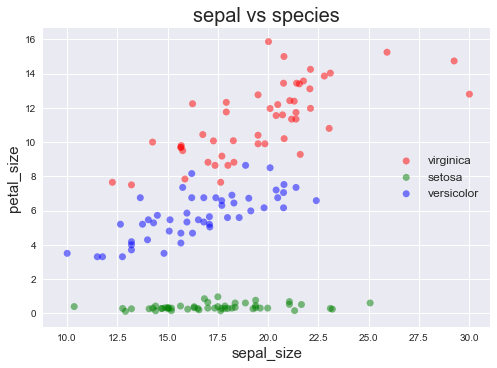

In [87]:
colors = ['red', 'green', 'blue']
z = flower_data['species'].value_counts().index
flower_data1 = flower_data.set_index(['species'])
x=flower_data1.sepal_size
y=flower_data1.petal_size
build_scatter_third(x,y,z,colors,'sepal_size','petal_size','sepal vs species')

### 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

#### 柱状图

In [105]:
def build_bar_graph(x_feature,y_mean,error_bar_std,x_label,y_label,title):
    _,ax = plt.subplots()
    ax.bar(range(len(x_feature)),y_mean,color='#539caf', align = 'center')#此处不能直接使用x_feature,应用数字类型len(x_feature)
    ax.errorbar(range(len(x_feature)),y_mean,yerr=error_bar_std,color = 'darkred', ls = 'none', lw = 5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    plt.setp(ax,xticks=range(len(x_feature)),xticklabels=x_feature)

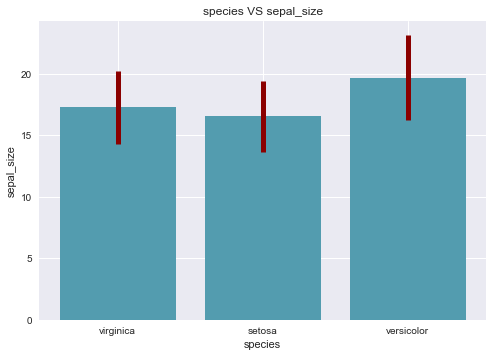

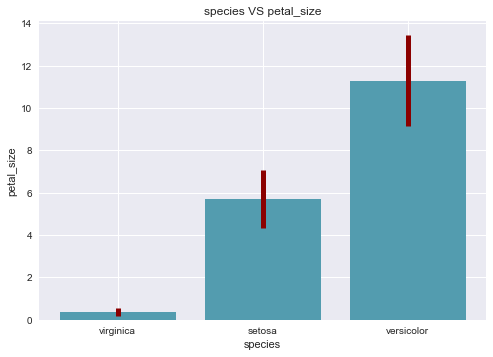

In [107]:
x_feature = flower_data['species'].value_counts().index.values
mean_std_data = flower_data[['sepal_size','species']].groupby('species').agg([np.mean,np.std])
mean_std_data.columns = mean_std_data.columns.droplevel()
build_bar_graph(x_feature,mean_std_data['mean'].values,mean_std_data['std'].values,'species','sepal_size','species VS sepal_size')

mean_std_data = flower_data[['petal_size','species']].groupby('species').agg([np.mean,np.std])
mean_std_data.columns = mean_std_data.columns.droplevel()
build_bar_graph(x_feature,mean_std_data['mean'].values,mean_std_data['std'].values,'species','petal_size','species VS petal_size')

#### 箱式图

In [131]:
species = flower_data['species'].value_counts().index.values

In [200]:
print(type(species))

<class 'numpy.ndarray'>


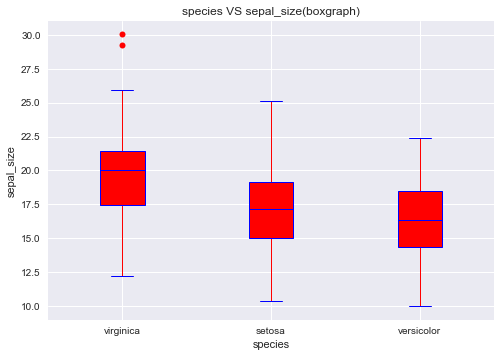

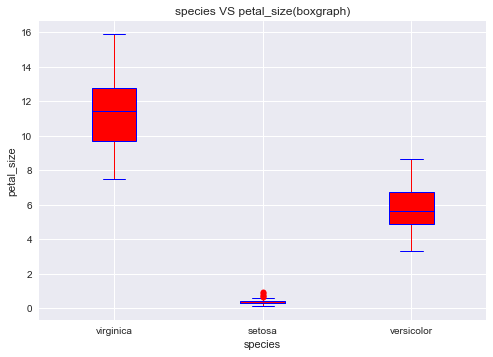

In [137]:
y_sepal_data = [flower_data1['sepal_size'].loc[s] for s in species]
x_data = species
base_color = 'b'
median_color = 'r'
x_label = 'species'
y_sepal = 'sepal_size'
title = 'species VS sepal_size(boxgraph)'
bulid_box_plot(x_data,y_sepal_data, base_color, median_color, x_label, y_sepal, title)


y_petal_data = [flower_data1['petal_size'].loc[s] for s in species]
y_petal = 'petal_size'
title = 'species VS petal_size(boxgraph)'
bulid_box_plot(x_data,y_petal_data, base_color, median_color, x_label, y_petal, title)

### 餐厅小费问题

#### 问题1：小费和总消费之间的关系

In [116]:
tips_data = sns.load_dataset("tips")
print("--------------查看数据前5行———————————")
print(tips_data.head(),'\n')
print('--------------查看数据类型，数据缺失值情况-------')
tips_data.info()

--------------查看数据前5行———————————
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 

--------------查看数据类型，数据缺失值情况-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


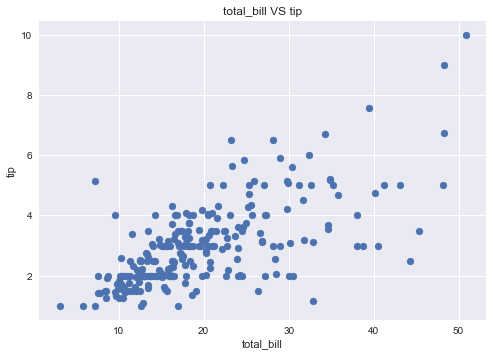

In [117]:
x_total_bill = tips_data.total_bill.values
y_tip = tips_data.tip.values
build_scatter_graph(x_total_bill,y_tip,'total_bill','tip','total_bill VS tip(scatter)')

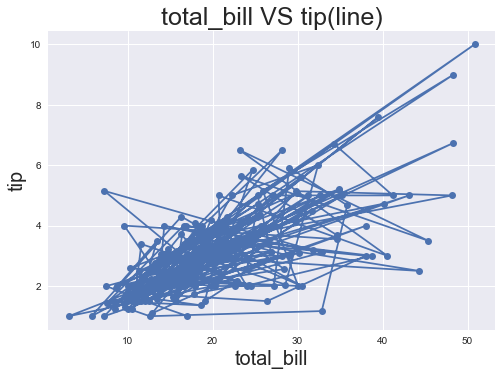

In [120]:
bulid_line_graph(x_total_bill,y_tip,'total_bill','tip','total_bill VS tip(line)','o')

通过这两个例子，我们不难发现，**散点图**在表示趋势关系时，要比**曲线图**效果好的多，这是因为曲线图在密集型分布时，线段花乱

##### 男性，女性谁更慷慨

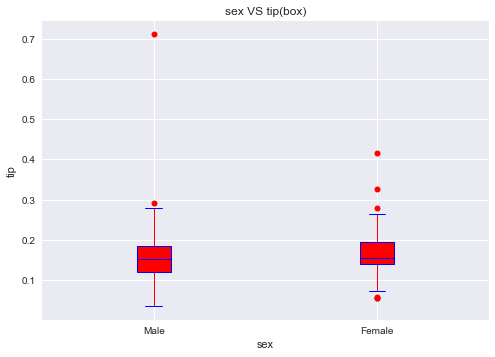

In [170]:
x_sex = tips_data['sex'].value_counts().index.values
tips_data['tip_percent'] = tips_data['tip']/tips_data['total_bill']
y_tip = [tips_data[tips_data['sex']==sex]['tip_percent'] for sex in x_sex]
bulid_box_plot(x_sex,y_tip, 'b', 'r', 'sex', 'tip', 'sex VS tip(box)')

##### 此处尝试使用散点图，如下，我们很容易看到图像效果，反应的信息较差

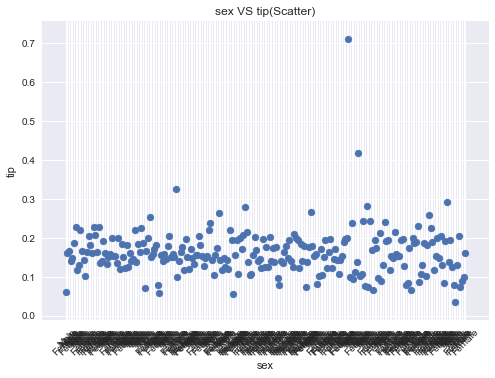

In [159]:
colors = ['red', 'green']
z =tips_data['sex'].value_counts().index
tips_data['tip_percent'] = tips_data['tip']/tips_data['total_bill']
x = tips_data['sex']
y = tips_data['tip_percent']
build_scatter_graph(x.values,y.values,'sex','tip','sex VS tip(Scatter)')

##### 再尝试使用三维，因为性别属于类别，而且其值只有两个

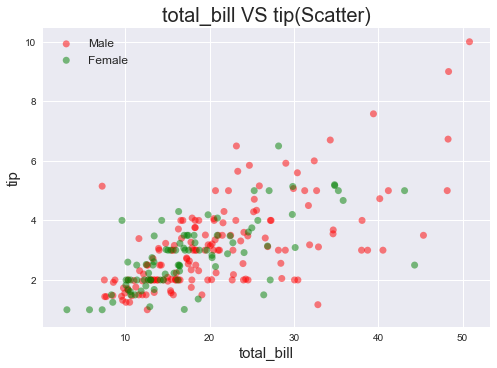

In [165]:
colors = ['red', 'green']
x_sex = tips_data['sex'].value_counts().index
tips_data1 = tips_data.set_index(['sex'])
x=tips_data1.total_bill
y=tips_data1.tip
build_scatter_third(x,y,x_sex,colors,'total_bill','tip','total_bill VS tip(Scatter)')

从上图我们可以很清晰看到分布的具体情况，同样这个我们也不用再次尝试曲线图，但是我们没有检测到**异常值**。所以我们可以将两个图结合起来。

#### 抽烟与否是否会对小费金额产生影响
* 这个问题与上面非常类似

##### 我们先用散点图分布情况

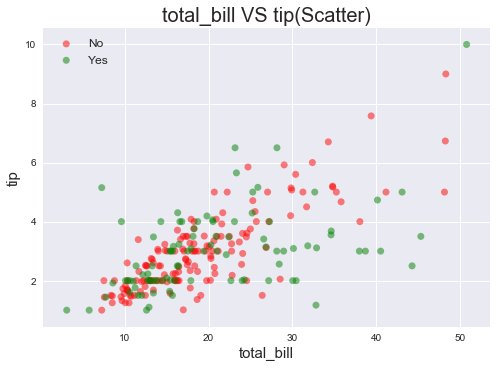

In [166]:
colors = ['red', 'green']
x_sex = tips_data['smoker'].value_counts().index
tips_data1 = tips_data.set_index(['smoker'])
x=tips_data1.total_bill
y=tips_data1.tip
build_scatter_third(x,y,x_sex,colors,'total_bill','tip','total_bill VS tip(Scatter)')

##### 再用箱式图来看下具体分布情况

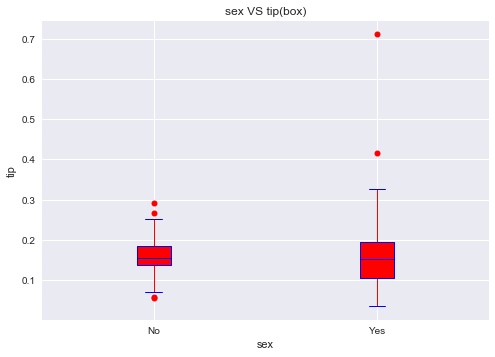

In [169]:
x_smoker = tips_data['smoker'].value_counts().index.values
tips_data['tip_percent'] = tips_data['tip']/tips_data['total_bill']
y_tip = [tips_data[tips_data['smoker']==smoker]['tip_percent'] for smoker in x_smoker]
bulid_box_plot(x_sex,y_tip, 'b', 'r', 'sex', 'tip', 'smoker VS tip(box)')

#### 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 提到时间我们要做的图就有：曲线图，柱状图，分类箱式图

In [172]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


##### 先来看柱状图

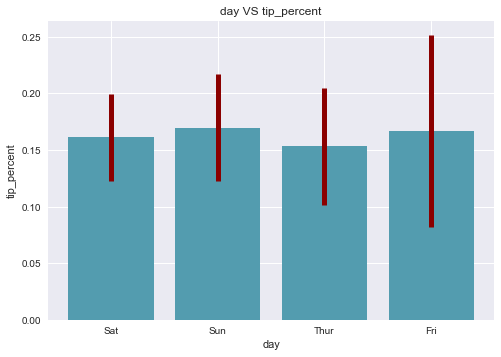

In [173]:
x_feature = tips_data['day'].value_counts().index.values
mean_std_data = tips_data[['tip_percent','day']].groupby('day').agg([np.mean,np.std])
mean_std_data.columns = mean_std_data.columns.droplevel()
build_bar_graph(x_feature,mean_std_data['mean'].values,mean_std_data['std'].values,'day','tip_percent','day VS tip_percent')

##### 曲线图(先做和，再做曲线图，这个是航线问题)

In [ ]:
per_year_passenger=data.groupby('year').sum()#在此处返回的是DataFrame
y=per_year_passenger['passengers'].values#获取其值
x=per_year_passenger.index
bulid_line_graph(x,y,'year','passager_sum','year VS passagers(line)','o')

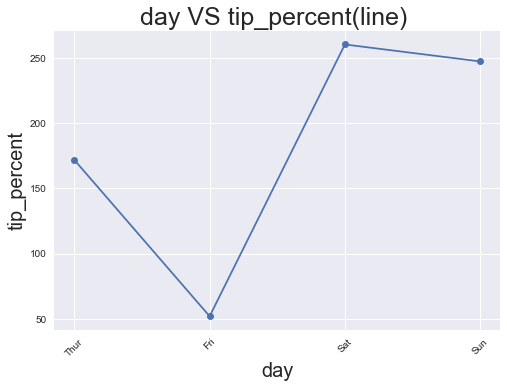

In [186]:
per_day_tip = tips_data.groupby('day').sum()#求和
y = per_day_tip.tip.values
x = per_day_tip.index
bulid_line_graph(x,y,'day','tip_percent',"day VS tip_percent(line) ",'o')

这样再对比一下，发现**求和折线图**有**柱状图**没有反映的信息

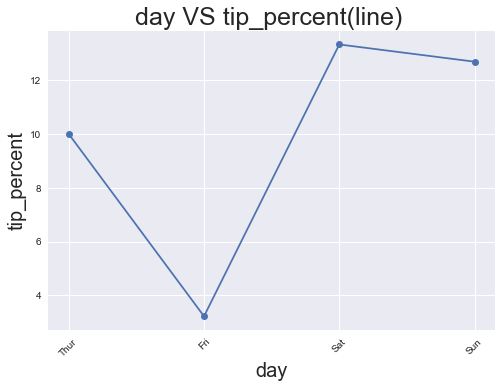

In [189]:
per_day_tip = tips_data.groupby('day').sum()#求和
y = per_day_tip.tip_percent.values
x = per_day_tip.index
bulid_line_graph(x,y,'day','tip_percent',"day VS tip_percent(line) ",'o')

这样再来看下，做归一化后的数据，也是同样的变化情况，又是一个新的发现

#### 分类箱式图
* 将周末和工作日分开

In [191]:
weekend=tips_data.query("day=='Sat' or day=='Sun'")['tip'].values
weekday=tips_data.query("not(day=='Sat' or day=='Sun')")['tip'].values

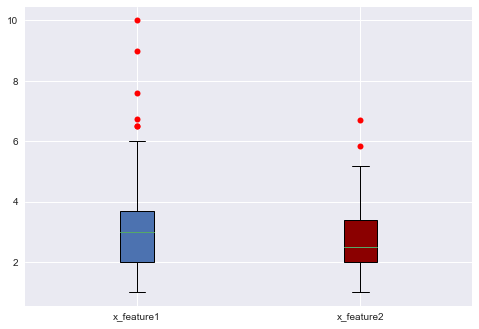

In [218]:
build_box_plot_2(weekend,weekday)

### 就餐人数对消费的影响：

 先看**散点图**，查看两个变量间的关系

<class 'numpy.int32'>


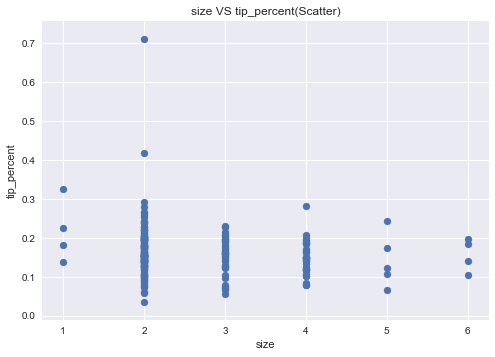

In [226]:
print(type(tips_data.size))
x=tips_data['size']
y=tips_data['tip_percent']
build_scatter_graph(x,y,'size','tip_percent','size VS tip_percent(Scatter)')

散点图也提供了一些信息，但是刻画的不是非常形象，下面查看size的取值情况，所以，可以换用折线图

In [228]:
tips_data['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

#### 折现图

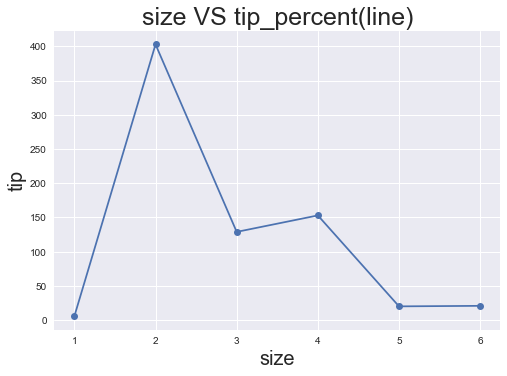

In [232]:
per_size_tip = tips_data.groupby('size').sum()
x = per_size_tip.index
y = per_size_tip['tip']
bulid_line_graph(x,y,'size','tip','size VS tip_percent(line)','o')

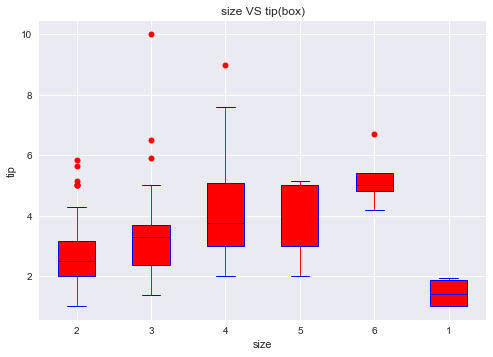

In [235]:
x_size = tips_data['size'].value_counts().index.values
y_tip = [tips_data[tips_data['size']==size]['tip'] for size in x_size]
bulid_box_plot(x_size,y_tip, 'b', 'r', 'size', 'tip', 'size VS tip(box)')

### 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

##### 组合特征

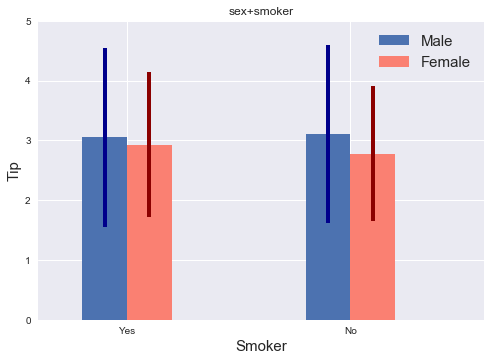

In [238]:
#离散变量、组合的数据先做分组
tmp_data=tips_data.groupby(['sex','smoker'])['tip'].agg([np.mean,np.std])#
width = 0.2
_,axe=plt.subplots()
plt.bar([1,2],tmp_data['mean'].loc['Male'],width=width, label='Male')
plt.errorbar([1,2],tmp_data['mean'].loc['Male'], 
             yerr = tmp_data['std'].loc['Male'], ls ='none',lw=4,color='darkblue',label=None)
plt.bar([x+width for x in [1,2]],tmp_data['mean'].loc['Female'],width=width,label='Female',color='salmon')
plt.errorbar([x+width for x in [1,2]],tmp_data['mean'].loc['Female'],
             yerr=tmp_data['std'].loc['Female'],ls='none',lw=4,color='darkred',label=None)
plt.setp(axe, xticks=[1.1,2.1], xticklabels=['Yes','No'])
plt.legend(fontsize=15)
plt.xlabel('Smoker',fontsize=15)
plt.ylabel('Tip',fontsize=15)
plt.axis([0.7,2.7,0,5])
plt.title(u'sex+smoker')

## 男女吸烟的占比